# 🫀 Proyecto de Portafolio: Clasificación de Enfermedad Cardíaca

## 📦 Paso 1: Importar Librerías

In [1]:
# Librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)

import warnings
warnings.filterwarnings('ignore')

print('✅ Librerías cargadas correctamente!')

✅ Librerías cargadas correctamente!


## 📥 Paso 2: Cargar los Datos

Dataset de UCI Machine Learning Repository - funciona 100%

In [2]:
# URL que SÍ funciona - UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Nombres de las columnas (el dataset no tiene header)
column_names = [
    'age',           # Edad en años
    'sex',           # Sexo (1=hombre, 0=mujer)
    'cp',            # Tipo de dolor de pecho (0-3)
    'trestbps',      # Presión arterial en reposo (mm Hg)
    'chol',          # Colesterol sérico (mg/dl)
    'fbs',           # Azúcar en sangre > 120 mg/dl (1=sí, 0=no)
    'restecg',       # Resultados electrocardiográficos
    'thalach',       # Frecuencia cardíaca máxima alcanzada
    'exang',         # Angina inducida por ejercicio (1=sí, 0=no)
    'oldpeak',       # Depresión ST inducida por ejercicio
    'slope',         # Pendiente del segmento ST
    'ca',            # Número de vasos principales coloreados
    'thal',          # Talasemia (3=normal, 6=defecto fijo, 7=defecto reversible)
    'target'         # Diagnóstico (0=no enfermedad, 1-4=enfermedad)
]

print('📥 Descargando datos de UCI Repository...')
df = pd.read_csv(url, names=column_names, na_values='?')
print(f'✅ Dataset cargado: {df.shape[0]} registros, {df.shape[1]} columnas')

📥 Descargando datos de UCI Repository...
✅ Dataset cargado: 303 registros, 14 columnas


## 🔍 Paso 3: Exploración Inicial (EDA)

In [3]:
# Ver las primeras filas
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [4]:
# Información del dataset
print('📊 Información del Dataset:')
print('=' * 50)
df.info()

📊 Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [5]:
# Estadísticas descriptivas
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,299.00,301.00,303.00
mean,54.44,0.68,3.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.67,4.73,0.94
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,0.94,1.94,1.23
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,3.00,0.00
50%,56.00,1.00,3.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00,3.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00,2.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00,4.00


In [6]:
# Valores nulos
print('🔍 Valores Nulos:')
print('=' * 50)
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])
print(f'\nTotal registros con nulos: {df.isnull().any(axis=1).sum()}')

🔍 Valores Nulos:
ca      4
thal    2
dtype: int64

Total registros con nulos: 6


## 🧹 Paso 4: Limpieza de Datos

In [7]:
# Eliminar filas con valores nulos (son pocas)
df_clean = df.dropna()
print(f'Registros originales: {len(df)}')
print(f'Registros después de limpieza: {len(df_clean)}')
print(f'Registros eliminados: {len(df) - len(df_clean)}')

# Convertir target a binario (0=sano, 1=enfermo)
df_clean['target'] = (df_clean['target'] > 0).astype(int)
print(f'\n📊 Distribución del Target:')
print(df_clean['target'].value_counts())

Registros originales: 303
Registros después de limpieza: 297
Registros eliminados: 6

📊 Distribución del Target:
target
0    160
1    137
Name: count, dtype: int64


## 📈 Paso 5: Visualizaciones

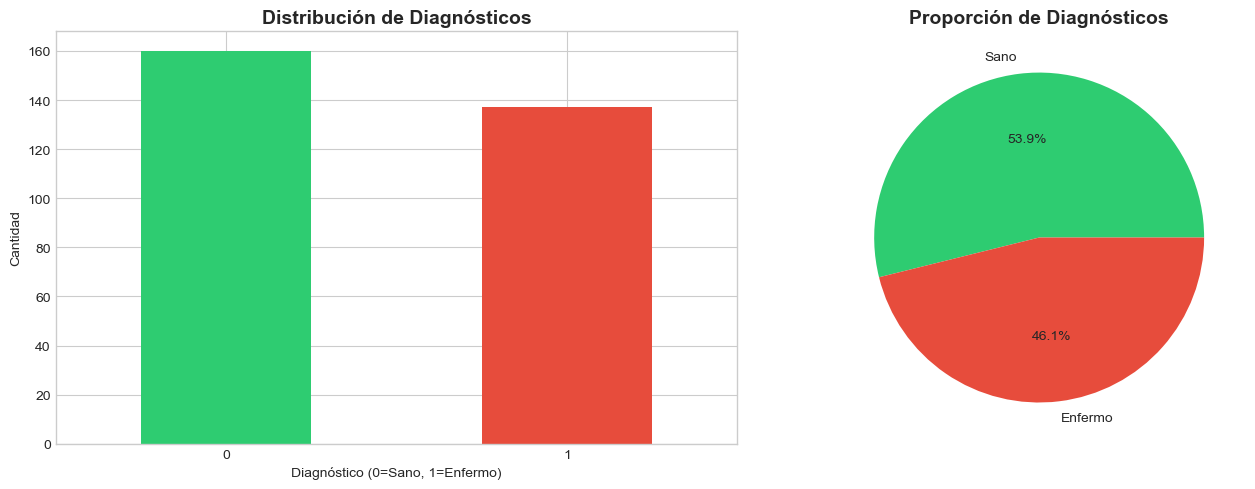

In [8]:
# Distribución del target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
target_counts = df_clean['target'].value_counts()
colors = ['#2ecc71', '#e74c3c']
target_counts.plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('Distribución de Diagnósticos', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Diagnóstico (0=Sano, 1=Enfermo)')
axes[0].set_ylabel('Cantidad')
axes[0].tick_params(axis='x', rotation=0)

# Gráfico de pastel
target_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=colors, labels=['Sano', 'Enfermo'])
axes[1].set_title('Proporción de Diagnósticos', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Distribución de edad por diagnóstico
fig, ax = plt.subplots(figsize=(12, 6))

df_clean[df_clean['target']==0]['age'].hist(alpha=0.7, label='Sano', bins=20, color='#2ecc71')
df_clean[df_clean['target']==1]['age'].hist(alpha=0.7, label='Enfermo', bins=20, color='#e74c3c')

ax.set_title('Distribución de Edad por Diagnóstico', fontsize=14, fontweight='bold')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.legend()
plt.show()

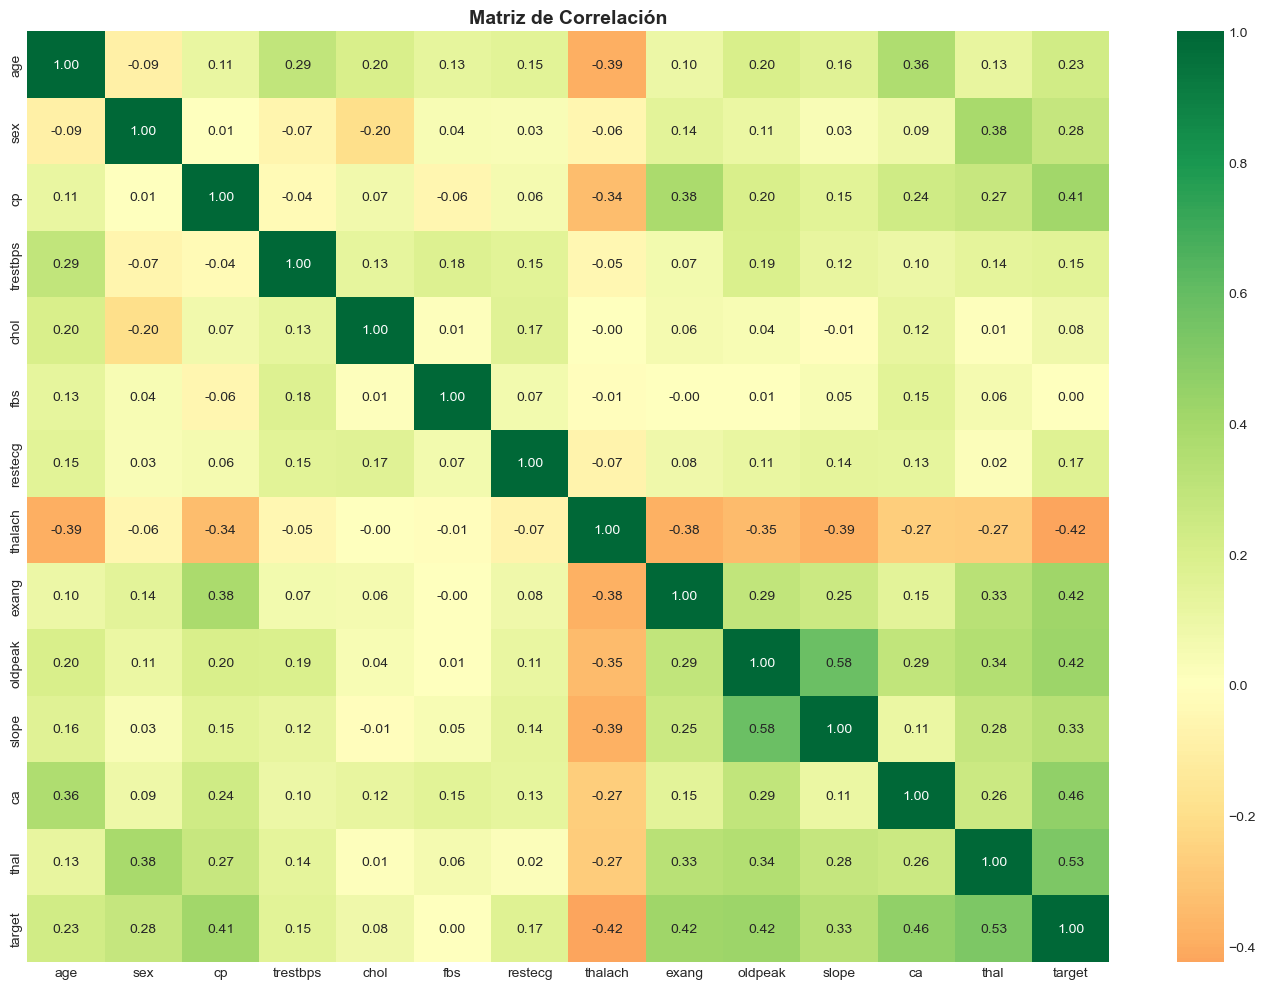

In [9]:
# Correlación entre variables
fig, ax = plt.subplots(figsize=(14, 10))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0, fmt='.2f', ax=ax)
ax.set_title('Matriz de Correlación', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 🤖 Paso 6: Preparación para Machine Learning

In [10]:
# Separar features (X) y target (y)
X = df_clean.drop('target', axis=1)
y = df_clean['target']

print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

# Dividir en train y test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'\nTrain set: {X_train.shape[0]} registros')
print(f'Test set: {X_test.shape[0]} registros')

Features shape: (297, 13)
Target shape: (297,)

Train set: 237 registros
Test set: 60 registros


In [12]:
# Escalar los datos (importante para muchos algoritmos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('✅ Datos escalados correctamente')

✅ Datos escalados correctamente


## 🎯 Paso 7: Entrenar Modelos

In [13]:
# Modelo 1: Regresión Logística
print('🔄 Entrenando Regresión Logística...')
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f'✅ Accuracy Regresión Logística: {accuracy_lr:.2%}')

🔄 Entrenando Regresión Logística...
✅ Accuracy Regresión Logística: 86.67%


In [14]:
# Modelo 2: Random Forest
print('🔄 Entrenando Random Forest...')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'✅ Accuracy Random Forest: {accuracy_rf:.2%}')

🔄 Entrenando Random Forest...
✅ Accuracy Random Forest: 88.33%


## 📊 Paso 8: Evaluación de Modelos

In [15]:
# Comparar modelos
print('📊 COMPARACIÓN DE MODELOS')
print('=' * 50)
print(f'Regresión Logística: {accuracy_lr:.2%}')
print(f'Random Forest:       {accuracy_rf:.2%}')
print('=' * 50)

mejor_modelo = 'Regresión Logística' if accuracy_lr > accuracy_rf else 'Random Forest'
print(f'🏆 Mejor modelo: {mejor_modelo}')

📊 COMPARACIÓN DE MODELOS
Regresión Logística: 86.67%
Random Forest:       88.33%
🏆 Mejor modelo: Random Forest


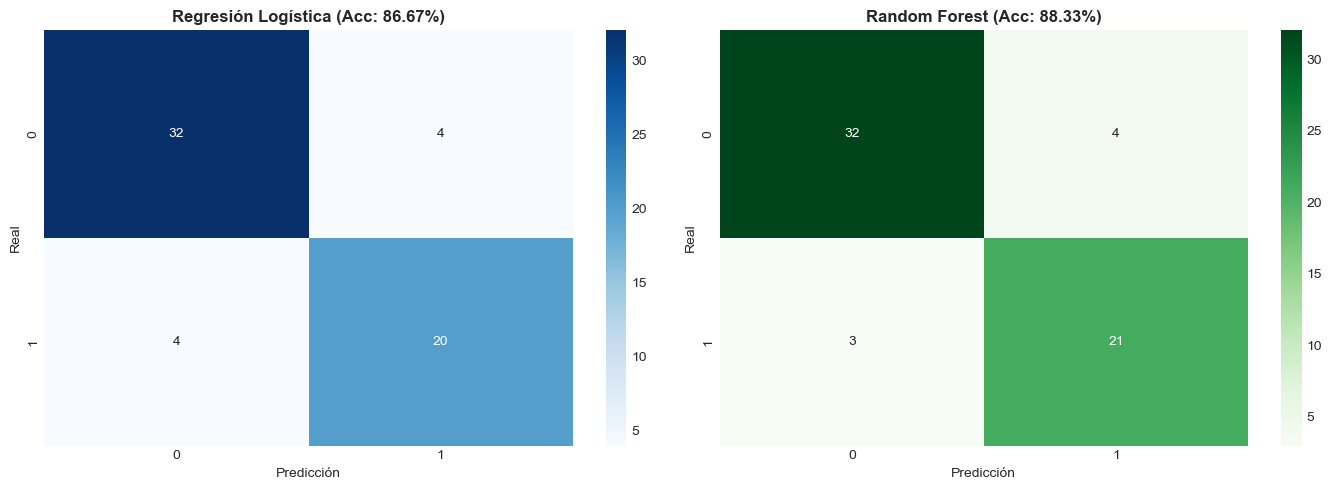

In [16]:
# Matriz de confusión del mejor modelo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Regresión Logística
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Regresión Logística (Acc: {accuracy_lr:.2%})', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title(f'Random Forest (Acc: {accuracy_rf:.2%})', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

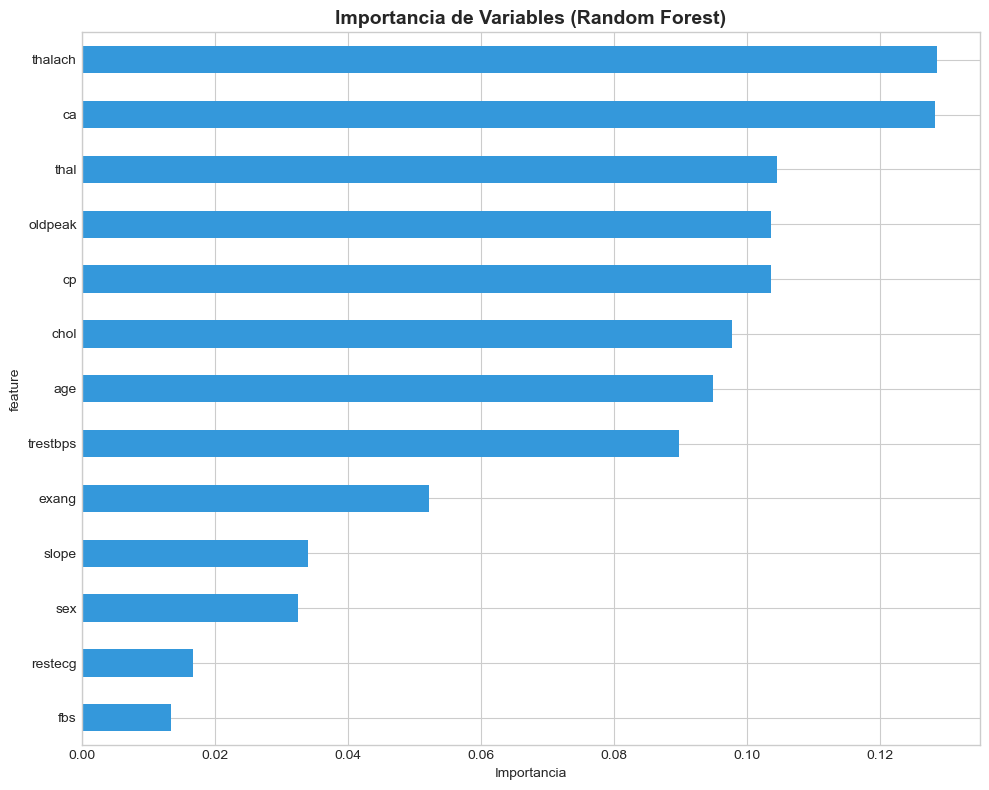

In [17]:
# Feature Importance (Random Forest)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

fig, ax = plt.subplots(figsize=(10, 8))
feature_importance.plot(kind='barh', x='feature', y='importance', ax=ax, color='#3498db', legend=False)
ax.set_title('Importancia de Variables (Random Forest)', fontsize=14, fontweight='bold')
ax.set_xlabel('Importancia')
plt.tight_layout()
plt.show()

In [18]:
df.corr()['target'].sort_values(ascending=False)

target      1.000000
ca          0.518909
thal        0.509923
oldpeak     0.504092
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
trestbps    0.157754
chol        0.070909
fbs         0.059186
thalach    -0.415040
Name: target, dtype: float64

## ⚖️ Paso 8: Análisis de Umbral de Predicción y Trade-offs

En medicina, es crítico minimizar los **Falsos Negativos** (personas enfermas clasificadas como sanas). En esta sección exploramos cómo impacta el cambio del umbral de decisión en la sensibilidad del modelo.

In [19]:
# Análisis de desempeño:

Accuracy con threshold 0.3: 75.00%
[[22 14]
 [ 1 23]]


## 🛡️ Paso 9: Implementación de Support Vector Machine (SVM)

Evaluamos el desempeño de un algoritmo de fronteras geométricas (SVM) para compararlo con el modelo de Bosque Aleatorio.

In [21]:
# Análisis de desempeño:

Accuracy SVM: 88.33%


## 🤏 Paso 10: Parsimonia del Modelo - Análisis con Top 5 Variables

¿Es posible mantener el desempeño reduciendo la complejidad? Evaluamos el modelo utilizando únicamente las 5 características más influyentes identificadas anteriormente.

In [29]:
# 1. Definir features (solo las top 5)
top_features = ['thal', 'cp', 'ca', 'oldpeak', 'thalach']
X_top = df_clean[top_features]
y_top = df_clean['target']  # Aquí ya es binario (0 y 1)

# 2. Split (Tu Hippie Seed)
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    X_top, y_top, test_size=0.2, random_state=210695
)

# 3. Escalar
scaler_top = StandardScaler()
X_train_top_scaled = scaler_top.fit_transform(X_train_top)
X_test_top_scaled = scaler_top.transform(X_test_top)

# 4. Entrenar
rf_top = RandomForestClassifier(n_estimators=100, random_state=210695)
rf_top.fit(X_train_top_scaled, y_train_top)

# 5. Evaluar
acc_top = rf_top.score(X_test_top_scaled, y_test_top)
print(f"Accuracy con solo 5 variables: {acc_top:.2%}")

Accuracy con solo 5 variables: 83.33%


## 🎯 Conclusiones del Proyecto